<a href="https://colab.research.google.com/github/Sachinsatya/data_insights-/blob/main/VGG_%26_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# FCNN --> CNN 
# VGG - Visual Geometry Group, Oxford (vgg16, vgg19)

# ImageNet --> 1M images across 1K category

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

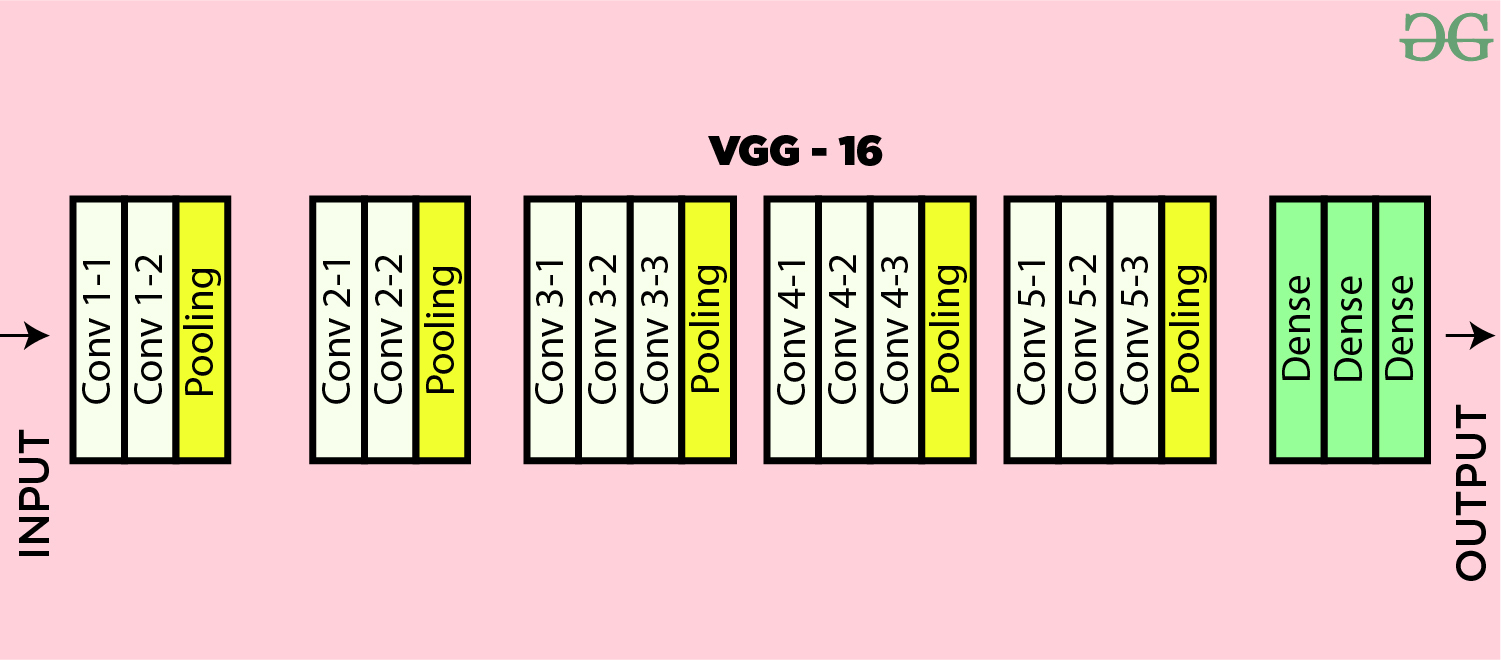

In [ ]:
vgg = tf.keras.applications.vgg16.VGG16()

553467096/553467096 [==============================] - 21s 0us/step


In [ ]:
# Trained model is made up of 2 things - 
# 1. weigths (weigths & bias)
# 2. Architecture

In [ ]:
vgg.input_shape

(None, 224, 224, 3)

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

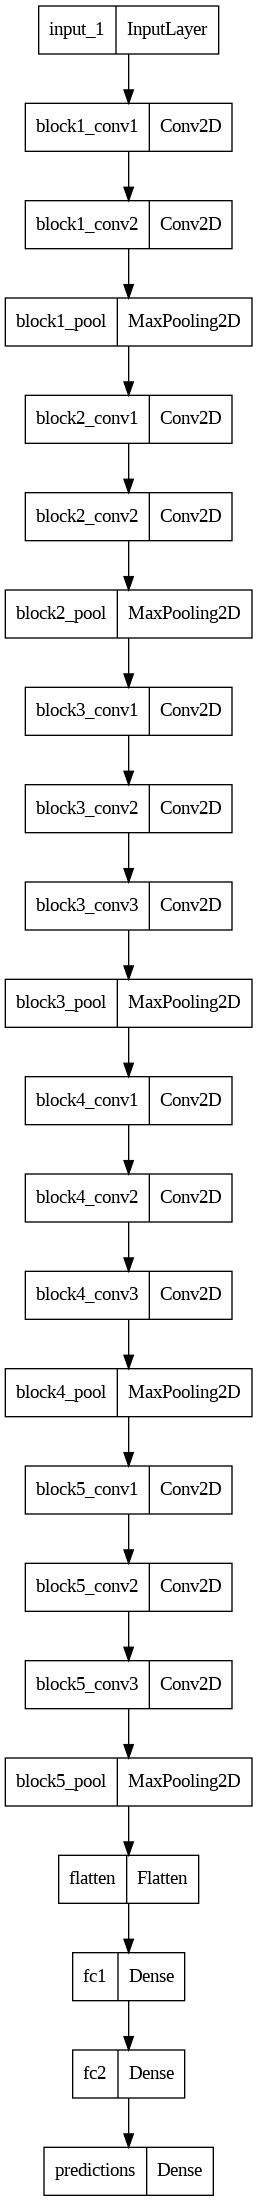

In [ ]:
tf.keras.utils.plot_model(vgg)

In [ ]:
# Weights 
len(vgg.get_weights())

32

In [ ]:
# Architecture of Model 
vgg.to_json()

'{"class_name": "Functional", "config": {"name": "vgg16", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 224, 224, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Conv2D", "config": {"name": "block1_conv1", "trainable": true, "dtype": "float32", "filters": 64, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "block1_conv1", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Conv2D", "config": {"name": "block1_conv2", "trainable": true, "dtype": "float32", "fil

In [ ]:
vgg.output_shape

(None, 1000)

In [ ]:
# Prediction
pred = np.ones(shape=(1, 1000))
category = [p[1] for p in tf.keras.applications.vgg16.decode_predictions(pred, top=1000)[0]]

In [ ]:
category

In [ ]:
np.random.choice(category)

'hard_disc'

In [ ]:
! wget https://5.imimg.com/data5/UR/NM/MY-24904855/external-hard-disk-500x500.jpg

--2023-03-26 15:27:55--  https://5.imimg.com/data5/UR/NM/MY-24904855/external-hard-disk-500x500.jpg
Resolving 5.imimg.com (5.imimg.com)... 13.35.24.50, 13.35.24.11, 13.35.24.128, ...
Connecting to 5.imimg.com (5.imimg.com)|13.35.24.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘external-hard-disk-500x500.jpg’

external-hard-disk-     [ <=>                ]  30.17K  --.-KB/s    in 0.1s    

2023-03-26 15:27:56 (244 KB/s) - ‘external-hard-disk-500x500.jpg’ saved [30895]



In [ ]:
image = cv2.imread("external-hard-disk-500x500.jpg")
image = cv2.resize(image, (224, 224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

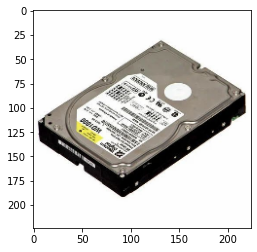

In [ ]:
plt.imshow(image)

In [ ]:
pre_image = tf.keras.applications.vgg16.preprocess_input(image)

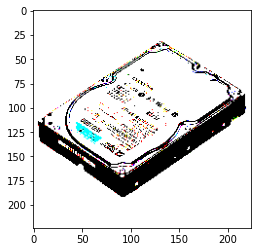

In [ ]:
plt.imshow(pre_image)

In [ ]:
vgg.input_shape

(None, 224, 224, 3)

In [ ]:
pre_image.shape

(224, 224, 3)

In [ ]:
pre_image = np.expand_dims(pre_image, axis=0)

In [ ]:
pre_image.shape

(1, 224, 224, 3)

In [ ]:
result = vgg.predict(pre_image)

1/1 [==============================] - 2s 2s/step


In [ ]:
vgg.output_shape

(None, 1000)

In [ ]:
result.shape

(1, 1000)

In [ ]:
np.argmax(result)

592

In [ ]:
tf.keras.applications.vgg16.decode_predictions(result, top=10)

[[('n03492542', 'hard_disc', 0.99508876),
  ('n03777754', 'modem', 0.0025749088),
  ('n02988304', 'CD_player', 0.0007563932),
  ('n02978881', 'cassette', 0.00051451736),
  ('n04041544', 'radio', 0.00042037034),
  ('n04392985', 'tape_player', 0.00022761845),
  ('n02979186', 'cassette_player', 0.00013351477),
  ('n04372370', 'switch', 5.47287e-05),
  ('n04141975', 'scale', 5.3809763e-05),
  ('n03692522', 'loupe', 5.062833e-05)]]

In [ ]:
def vgg_predict(imagePath):
  image = cv2.imread(imagePath)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  image = tf.keras.applications.vgg16.preprocess_input(image)
  image = np.expand_dims(image, axis=0)
  result = vgg.predict(image)
  return image[0], result

In [ ]:
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/BIR_Grupp_2-_TIBETANSK_MASTIFF%2C_Legenda_Tibeta_Temudzhin_%2823938629470%29.jpg/1200px-BIR_Grupp_2-_TIBETANSK_MASTIFF%2C_Legenda_Tibeta_Temudzhin_%2823938629470%29.jpg

--2023-03-26 15:41:25--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/BIR_Grupp_2-_TIBETANSK_MASTIFF%2C_Legenda_Tibeta_Temudzhin_%2823938629470%29.jpg/1200px-BIR_Grupp_2-_TIBETANSK_MASTIFF%2C_Legenda_Tibeta_Temudzhin_%2823938629470%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133376 (130K) [image/jpeg]
Saving to: ‘1200px-BIR_Grupp_2-_TIBETANSK_MASTIFF,_Legenda_Tibeta_Temudzhin_(23938629470).jpg’

1200px-BIR_Grupp_2- 100%[===================>] 130.25K   244KB/s    in 0.5s    

2023-03-26 15:41:27 (244 KB/s) - ‘1200px-BIR_Grupp_2-_TIBETANSK_MASTIFF,_Legenda_Tibeta_Temudzhin_(23938629470).jpg’ saved [133376/133376]



In [ ]:
! mv 1200px-BIR_Grupp_2-_TIBETANSK_MASTIFF,_Legenda_Tibeta_Temudzhin_\(23938629470\).jpg tm_dog.jpg

In [ ]:
image, result  = vgg_predict("tm_dog.jpg")

1/1 [==============================] - 1s 955ms/step


[[('n02108551', 'Tibetan_mastiff', 0.7879216),
  ('n02111277', 'Newfoundland', 0.11515544),
  ('n02101006', 'Gordon_setter', 0.024997003),
  ('n02105056', 'groenendael', 0.02156844),
  ('n02099267', 'flat-coated_retriever', 0.019806249)]]

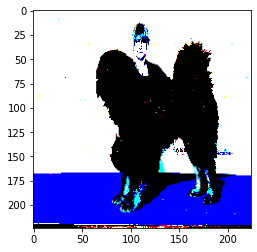

In [ ]:
plt.imshow(image)
tf.keras.applications.vgg16.decode_predictions(result)

In [ ]:
# Transfer Learning - 
# Model - Conv Layer + Cat Layer
# Conv Layer - is to understand the shapes, sizes of object and further create a feature
# Cat Layer - Rather than consumping the complete image, take features from Conv Layer and categorise them


# Transfer Learning - 
# That rather than learning from your own (scratch), why not take help me LARGE models( trained on huge dataset 
# and diverse categories).  
# They can help us, with their pre-trained filters (1M images, with 1K)

# 1. So, we will use their CONV layers (or their pretrained filters) and create features
# 2. And then create our own CAT layer

In [ ]:
# If we have VGG already, why do I need to create a model for Dog -Vs- Cat ? 
# 1) Can VGG be used for Dog Vs Cat ??? --- 

In [ ]:
[i for i in category if "dog" in i]

['African_hunting_dog',
 'Eskimo_dog',
 'French_bulldog',
 'Bernese_mountain_dog',
 'Greater_Swiss_Mountain_dog',
 'Shetland_sheepdog',
 'Old_English_sheepdog',
 'Maltese_dog',
 'hotdog',
 'dogsled']

In [ ]:
[i for i in category if "cat" in i]

['polecat',
 'tiger_cat',
 'Egyptian_cat',
 'Siamese_cat',
 'Persian_cat',
 'catamaran',
 'Madagascar_cat',
 'oystercatcher']